# Primary Vertex check

The discrepancy we see in the transverse impact parameter might come fromt the fact, that the primary vertices are off. 

In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FuncFormatter

import gc

from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2

In [2]:
from cycler import cycler
import matplotlib

# Set the color cycle
# https://coolors.co/542344-f68e5f-e5e059-007ea7-98e2c6
plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#e7298a', '#802392', '#ffad08', '#56b4e9']))
matplotlib.rcParams["font.family"] = "serif"
# Set font sizes
matplotlib.rcParams.update(
    {
        "font.size": 14,  # General font size
    }
)

In [4]:
path_fullsim = "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_debug_tracks/Huu.root"
path_fastsim = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/samples_v7/CLD_Huu_debug_tracks/Huu.root"

In [5]:
def load_data(file_name, stop=250000):
    file = uproot.open(file_name)
    tree = file['tree;1']
    data = tree.arrays(library="np", entry_start=0, entry_stop=stop)
    return data

In [31]:
dic = {"fast": load_data(path_fastsim, stop=5000), "full": load_data(path_fullsim, stop=100000),}

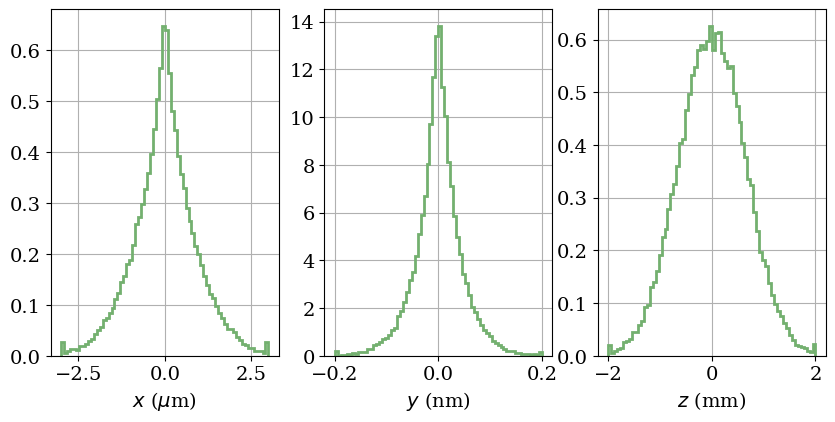

In [32]:
keys = ["jet_PV_x", "jet_PV_y", "jet_PV_z"]
xlabels = [r"$x$ ($\mu$m)", "$y$ (nm)", "$z$ (mm)"]
ranges = {
    "jet_PV_x": (-3, 3), #(-3e-3, 3e-3),
    "jet_PV_y": (-0.2, 0.2),
    "jet_PV_z": (-2, 2),
}
multipliers = {
    "jet_PV_x": 1e3,
    "jet_PV_y": 1e6,
    "jet_PV_z": 1,
}

bins = 70

fig, ax = plt.subplots(1, 3, figsize=(10, 4.5))


for i, key in enumerate(keys):

    data = dic["full"][key] * multipliers[key] 

    # overflow bins
    d = np.clip(data, ranges[key][0], ranges[key][1])

    ax[i].hist(d, bins=bins, histtype="step", label="fast", density=True, linewidth=2)
    ax[i].grid()
    ax[i].set_xlabel(xlabels[i])
    
plt.show()

Expected at 250 GeV: $x = 9.87$ $\mu$ m, $y= 25.4$ nm, $z= 0.65$ mm